In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn
import pylab as pl

In [2]:
path = r'C:\Users\esgib\OneDrive\Dokumente\Alina\Research Project\02 Data'

In [3]:
df_ed = pd.read_csv(os.path.join(path, 'Original Data', 'hdi_education_index.csv'))

# PREPARING THE DATA: MERGING AND FILLING MISSING VALUES

In [4]:
df_ed.head()

,id,utc_created,utc_updated,country,country_code,indicator_code,indicator,value,year
0,1,2016-01-07 10:10:52.689964,2016-01-07 10:10:52.690139,Afghanistan,AFG,103706,HDI: Education index,0.076,1980
1,2,2016-01-07 10:10:52.689964,2016-01-07 10:10:52.690139,Afghanistan,AFG,103706,HDI: Education index,0.103,1985
2,3,2016-01-07 10:10:52.689964,2016-01-07 10:10:52.690139,Afghanistan,AFG,103706,HDI: Education index,0.121,1990
3,4,2016-01-07 10:10:52.689964,2016-01-07 10:10:52.690139,Afghanistan,AFG,103706,HDI: Education index,0.175,1995
4,5,2016-01-07 10:10:52.689964,2016-01-07 10:10:52.690139,Afghanistan,AFG,103706,HDI: Education index,0.226,2000


In [5]:
df_ed['indicator'].value_counts()

HDI: Education index    2136
Name: indicator, dtype: int64

In [6]:
#selecting columns which are necessary for the project
df_ed = df_ed[['country', 'country_code', 'value', 'year'].copy()]

In [7]:
df_ed.head()

,country,country_code,value,year
0,Afghanistan,AFG,0.076,1980
1,Afghanistan,AFG,0.103,1985
2,Afghanistan,AFG,0.121,1990
3,Afghanistan,AFG,0.175,1995
4,Afghanistan,AFG,0.226,2000


In [8]:
#renaming columns to have easy and speaking names
df_ed = df_ed.rename(columns = {'country_code' : 'code', 'value' : 'ed_ind'})

In [9]:
df_ed.head()

,country,code,ed_ind,year
0,Afghanistan,AFG,0.076,1980
1,Afghanistan,AFG,0.103,1985
2,Afghanistan,AFG,0.121,1990
3,Afghanistan,AFG,0.175,1995
4,Afghanistan,AFG,0.226,2000


In [10]:
#checking for missing values (no missing values!)
df_ed.isnull().sum()

country    0
code       0
ed_ind     0
year       0
dtype: int64

In [11]:
#importing the file which contains other indexes necessary for this project
df_ge = pd.read_excel(os.path.join(path, 'Original Data', 'globaleconomy.xlsx'))

In [12]:
df_ge.head()

,Country,Code,ContinentCode,Year,Unemployment rate,Economic growth forecast,Rule of law index (-2.5 weak; 2.5 strong),"Fertility rate, births per woman","Doctors per 1,000 people",Gini income inequality index,"Public spending on education, percent of GDP",Literacy rate,"Female literacy rate, ages 15-24",Ratio of female to male students in secondary school,Non religious people as percent of the population,"Happiness Index, 0 (unhappy) - 10 (happy)",Human Development Index (0 - 1)
0,Afghanistan,AFG,AS,1960,NaN,NaN,NaN,7.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,AS,1961,NaN,NaN,NaN,7.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,AS,1962,NaN,NaN,NaN,7.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,AS,1963,NaN,NaN,NaN,7.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,AS,1964,NaN,NaN,NaN,7.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#checking for missing values
df_ge.isnull().sum()

Country                                                     0
Code                                                        0
ContinentCode                                            1525
Year                                                        0
Unemployment rate                                        6432
Economic growth forecast                                 4793
Rule of law index (-2.5 weak; 2.5 strong)                7584
Fertility rate, births per woman                          222
Doctors per 1,000 people                                10523
Gini income inequality index                             9934
Public spending on education, percent of GDP             7208
Literacy rate                                           10854
Female literacy rate, ages 15-24                        10739
Ratio of female to male students in secondary school     6082
Non religious people as percent of the population       10896
Happiness Index, 0 (unhappy) - 10 (happy)               10774
Human De

In [14]:
#creating a new df with only needed columns
df_rr = df_ge[['Country', 'Code', 'Year', 'Fertility rate, births per woman', 'Rule of law index (-2.5 weak; 2.5 strong)', 'Non religious people as percent of the population'].copy()]

In [15]:
df_rr.head()

,Country,Code,Year,"Fertility rate, births per woman",Rule of law index (-2.5 weak; 2.5 strong),Non religious people as percent of the population
0,Afghanistan,AFG,1960,7.28,NaN,NaN
1,Afghanistan,AFG,1961,7.28,NaN,NaN
2,Afghanistan,AFG,1962,7.29,NaN,NaN
3,Afghanistan,AFG,1963,7.30,NaN,NaN
4,Afghanistan,AFG,1964,7.30,NaN,NaN


In [16]:
df_rr.isnull().sum()

Country                                                  0
Code                                                     0
Year                                                     0
Fertility rate, births per woman                       222
Rule of law index (-2.5 weak; 2.5 strong)             7584
Non religious people as percent of the population    10896
dtype: int64

In [17]:
#renaming the columns
df_rr = df_rr.rename(columns = {'Country': 'country', 'Code' : 'code', 'Year':'year', 'Fertility rate, births per woman' : 'fertility', 'Rule of law index (-2.5 weak; 2.5 strong)': 'r_law', 'Non religious people as percent of the population': 'non_rel'})

In [18]:
df_rr.columns

Index(['country', 'code', 'year', 'fertility', 'r_law', 'non_rel'], dtype='object')

In [19]:
df_rr.shape

(11832, 6)

There are many missign values in this data. I will fill the gaps between values with everage between closest two values.

In [20]:
#This code applies the fill_missing_with_average function to fill missing values in the specified columns of the DataFrame df_rr. 
#The function groups the data by country, sorts it by year, 
#identifies the first non-empty value, and fills the missing values with the average of the nearest non-empty values. 


def fill_missing_with_average(df, country_col, year_col, cols):
    filled_data = []
    grouped = df.groupby(country_col)
    for _, group in grouped:
        group = group.sort_values(year_col)
        non_empty = group[cols].notnull().any(axis=1)
        if non_empty.sum() == 0:
            filled_data.append(group)
        else:
            first_non_empty_idx = non_empty.idxmax()
            filled_values = group[cols].copy()
            filled_values.iloc[first_non_empty_idx+1:] = np.nan
            filled_values = filled_values.interpolate(method='linear')
            group[cols] = filled_values
            filled_data.append(group)
    filled_df = pd.concat(filled_data)
    return filled_df

# Define the columns to fill missing values
cols_to_fill = ['fertility', 'r_law', 'non_rel']

# Apply the custom function to fill missing values
df_rr_filled = fill_missing_with_average(df_rr, 'country', 'year', cols_to_fill)

# Reset the index back to a regular column
df_rr_filled.reset_index(drop=True, inplace=True)

In [21]:
#checking for missing values again
df_rr_filled.isnull().sum()

country          0
code             0
year             0
fertility      167
r_law         7026
non_rel      10756
dtype: int64

Comment: We see that there are still missing values, it happens becuase the process of filling emty cells start with the first not empty cell, so all cells before the first cell with value remained untouched. To continue our reasearch we will drop the lines with empty values.

In [22]:
#dropping the lines with empty values
df_rr_filled = df_rr_filled.dropna()

In [23]:
df_rr_filled.shape

(475, 6)

In [24]:
df_merged = pd.merge(df_rr_filled, df_ed, on = ['code', 'year'], how = 'left')

In [25]:
df_merged.head()

,country_x,code,year,fertility,r_law,non_rel,country_y,ed_ind
0,Czechia,CZE,1996,1.18,0.920,39.9,NaN,NaN
1,Czechia,CZE,1997,1.17,0.895,40.0,NaN,NaN
2,Czechia,CZE,1998,1.16,0.870,40.1,NaN,NaN
3,Czechia,CZE,1999,1.13,0.740,40.3,NaN,NaN
4,Czechia,CZE,2000,1.15,0.610,40.4,Czech Republic,0.783


In [26]:
#dropping doubled columns
df_merged = df_merged.drop(columns = ['country_y'])
df_merged = df_merged.rename(columns = {'country_x':'country'})
df_merged.head()



,country,code,year,fertility,r_law,non_rel,ed_ind
0,Czechia,CZE,1996,1.18,0.920,39.9,NaN
1,Czechia,CZE,1997,1.17,0.895,40.0,NaN
2,Czechia,CZE,1998,1.16,0.870,40.1,NaN
3,Czechia,CZE,1999,1.13,0.740,40.3,NaN
4,Czechia,CZE,2000,1.15,0.610,40.4,0.783


Comment: At the beginning the education index has been measured only once in five years, later, but in the last years, it was measured every year. Therefore I used the same procedure as above, to fill in missing values. Note that filling in the missing values starts only with the first not empty cell, therefor there will still be empty values after applying this function

In [27]:
def fill_missing_with_average(df, country_col, year_col, education_col):
    filled_data = []
    grouped = df.groupby(country_col)
    for _, group in grouped:
        group = group.sort_values(year_col)
        non_empty = group[education_col].notnull()
        if non_empty.sum() == 0:
            filled_data.append(group)
        else:
            first_non_empty_idx = non_empty.idxmax()
            filled_values = group[education_col].copy()
            filled_values.iloc[first_non_empty_idx+1:] = np.nan
            filled_values = filled_values.interpolate(method='linear')
            group[education_col] = filled_values
            filled_data.append(group)
    filled_df = pd.concat(filled_data)
    return filled_df

# Apply the custom function to fill missing values
df_merged_filled = fill_missing_with_average(df_merged, 'country', 'year', 'ed_ind')

# Reset the index back to a regular column
df_merged_filled.reset_index(drop=True, inplace=True)

In [28]:
#checking how many missing values are left
df_merged_filled.isnull().sum()

country       0
code          0
year          0
fertility     0
r_law         0
non_rel       0
ed_ind       76
dtype: int64

In [29]:
#dropping missing values
df_merged_filled = df_merged_filled.dropna()

In [30]:
df_merged_filled.shape

(399, 7)

In [31]:
df_merged_filled.columns

Index(['country', 'code', 'year', 'fertility', 'r_law', 'non_rel', 'ed_ind'], dtype='object')

In [32]:
df_merged_filled.to_excel(os.path.join(path, 'Prepared Data', 'ed_rel_rlaw.xlsx'))

# CHECKING DATA QUALITY

In [33]:
#checking for duplicates
df_dup = df_merged_filled[df_merged_filled.duplicated()]
df_dup.shape

(0, 7)

no Duplicates!

In [34]:
#checking for mixed type values
for col in df_merged_filled.columns.tolist():
      weird = (df_merged_filled[[col]].applymap(type) != df_merged_filled[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_merged_filled[weird]) > 0:
        print (col)

No mixed-type columns either!

# EXPLORING RELATIONSHIPS

In [35]:
#creating correlation matrix
df_merged_filled.corr()

C:\Users\esgib\AppData\Local\Temp\ipykernel_14832\1404467268.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_merged_filled.corr()


,year,fertility,r_law,non_rel,ed_ind
year,1.000000,-0.108053,0.059020,0.026927,0.177940
fertility,-0.108053,1.000000,-0.512165,-0.433551,-0.673096
r_law,0.059020,-0.512165,1.000000,0.495704,0.702988
non_rel,0.026927,-0.433551,0.495704,1.000000,0.577237
ed_ind,0.177940,-0.673096,0.702988,0.577237,1.000000


C:\Users\esgib\AppData\Local\Temp\ipykernel_14832\3350530890.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_merged_filled.corr()


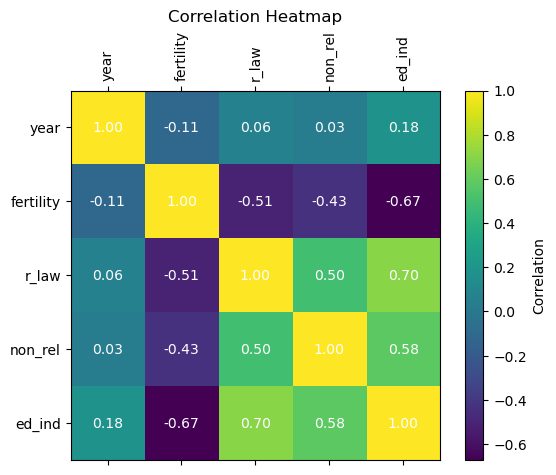

In [36]:
#Vizualizing the correlation matrix

corr_matrix = df_merged_filled.corr()

# Create a figure and axes for the heatmap
fig, ax = plt.subplots()

# Plot the correlation heatmap
heatmap = ax.matshow(corr_matrix)

# Customize the colorbar
cbar = plt.colorbar(heatmap)
cbar.set_label('Correlation')

# Set the x-axis and y-axis labels
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

# Show the correlation values in the heatmap cells
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                       ha='center', va='center', color='w')

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

We can see that there is a negative correlation between percentage of non religious population and fertility rate. As well as relation ship between rule of law index and fertility rate. The relationship between education indeyx and fertility is even stronger

In [37]:
subset = df_merged[['fertility', 'r_law', 'non_rel', 'ed_ind']]

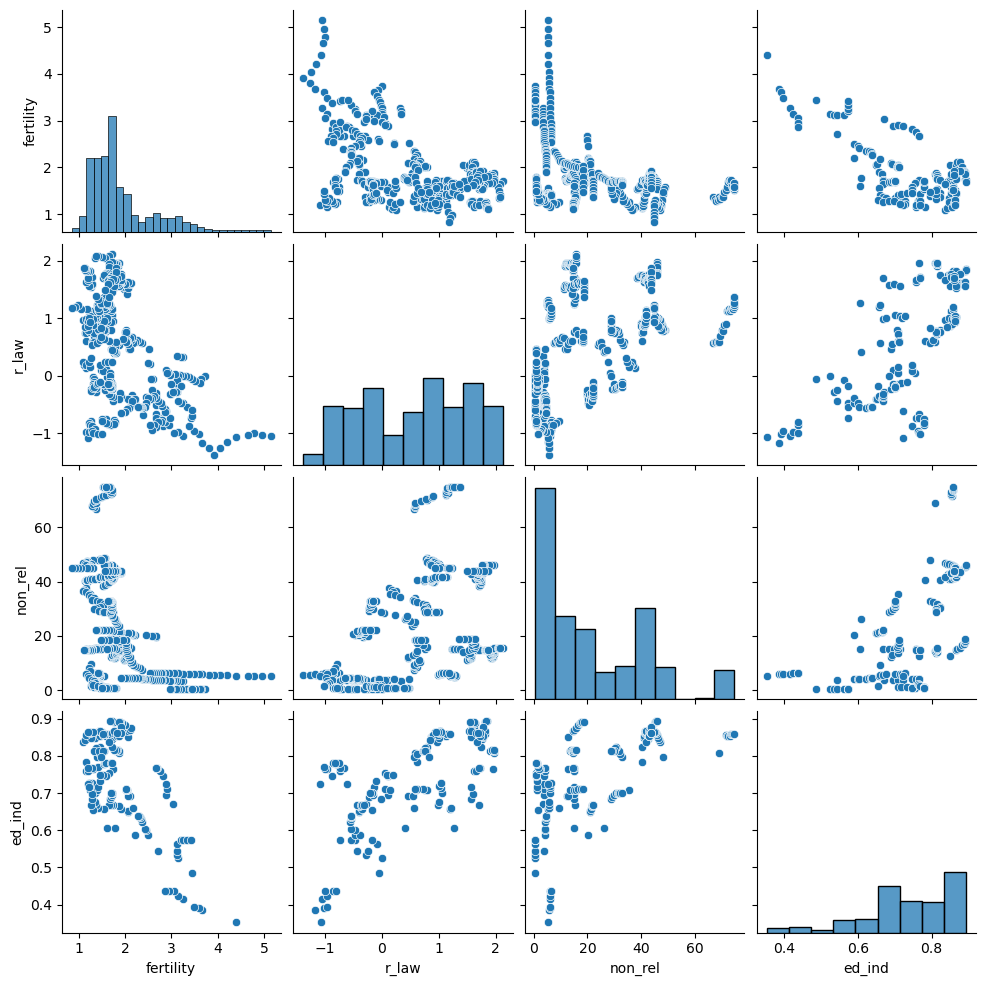

In [38]:
g = sns.pairplot(subset)

# CLUSTERING

In [39]:
# Creating a new dataframe used for clustering algorithm
df_cl = df_merged_filled[['fertility', 'non_rel', 'ed_ind', 'r_law'].copy()]

In [40]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

Comment: to find out the optimal number of clusters I will use Elobw technick.

In [41]:
score = [kmeans[i].fit(df_cl).score(df_cl) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\esgib\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\esgib\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\esgib\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\esgib\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[-154032.05305882805,
 -38314.834709600225,
 -18122.319665969047,
 -6998.428492519571,
 -2660.3031374383686,
 -1849.1678681313713,
 -1236.7574737352274,
 -982.7005301161163,
 -816.8272846637353]

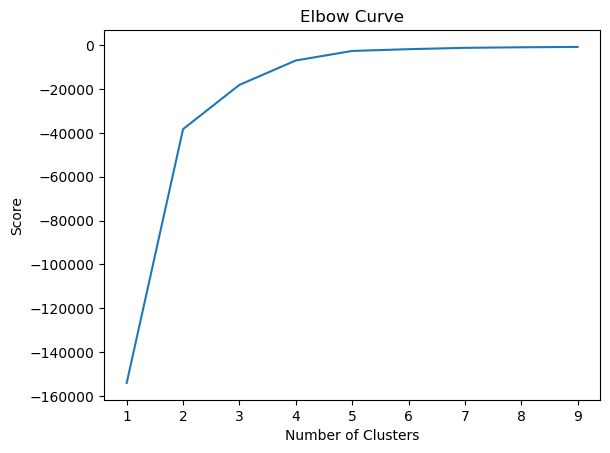

In [42]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

It looks like to optimal number of clusters is 4

In [43]:
kmeans = KMeans(n_clusters = 4)

In [44]:
df_cl['clusters'] = kmeans.fit_predict(df_cl)

C:\Users\esgib\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\esgib\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\esgib\AppData\Local\Temp\ipykernel_14832\628070371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl['clusters'] = kmeans.fit_predict(df_cl)


In [45]:
df_cl.head()

,fertility,non_rel,ed_ind,r_law,clusters
4,1.15,40.4,0.783,0.610,1
5,1.15,40.5,0.783,0.735,1
6,1.17,40.6,0.783,0.860,1
7,1.18,40.7,0.783,0.870,1
8,1.23,40.8,0.783,0.760,1


In [46]:
df_cl['clusters'].value_counts()

0    150
3    118
1    110
2     21
Name: clusters, dtype: int64

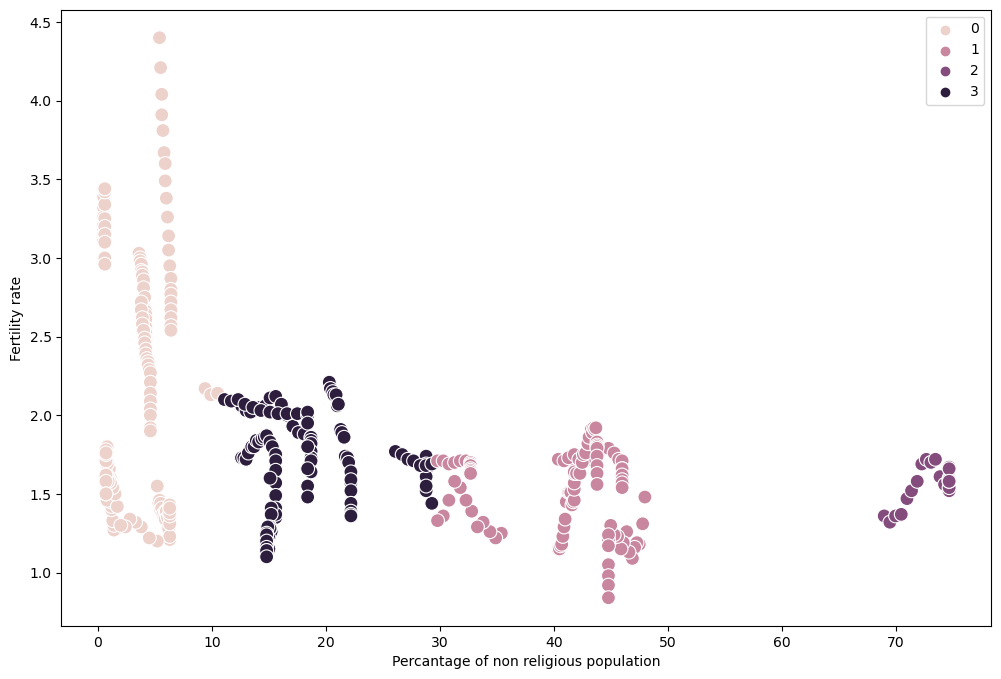

In [47]:
#visulizing the clusters using percentage of non religious population and fertility rate.

plt.figure(figsize=(12,8))
ax=sns.scatterplot(x=df_cl['non_rel'], y=df_cl['fertility'], hue = kmeans.labels_, s=100)
ax.grid(False)
plt.ylabel('Fertility rate')
plt.xlabel('Percantage of non religious population')
plt.show()

Comment: The beige cluster exhibits moderately higher fertility rates, indicating that cultural and religious factors still influence fertility decisions. 
In contrast, the dark purple and lila clusters show lower fertility rates, suggesting that a higher percentage of non-religious population leads to smaller family sizes and greater individual autonomy in family planning choices.
The rosa cluster demonstrates moderate fertility rates with a moderate percentage of non-religious population, indicating that other factors such as education and socio-economic conditions may also play a role

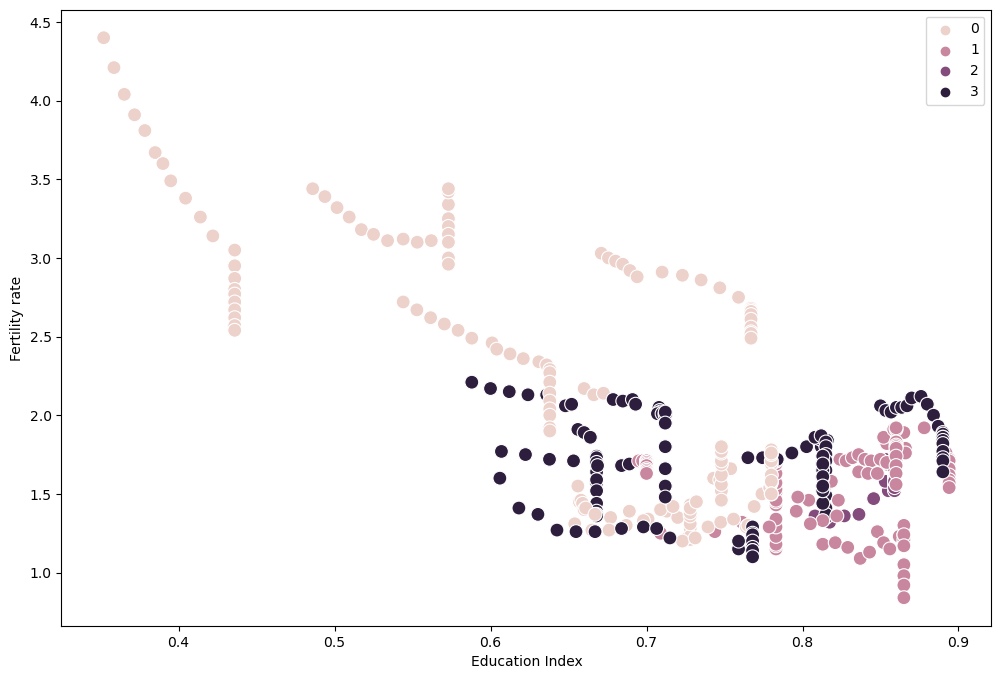

In [48]:
plt.figure(figsize=(12,8))
ax=sns.scatterplot(x=df_cl['ed_ind'], y=df_cl['fertility'], hue = kmeans.labels_, s=100)
ax.grid(False)
plt.ylabel('Fertility rate')
plt.xlabel('Education Index')
plt.show()

The dark purple cluster, with higher education indices, exhibits lower fertility rates, suggesting that increased access to education leads to informed family planning choices. Similarly, the lila cluster, characterized by higher education levels, also shows lower fertility rates, indicating that improved education access and socio-economic opportunities contribute to lower fertility rates. The rosa cluster, with moderate education levels, displays moderate fertility rates, suggesting that factors beyond education may influence fertility decisions within this cluster.

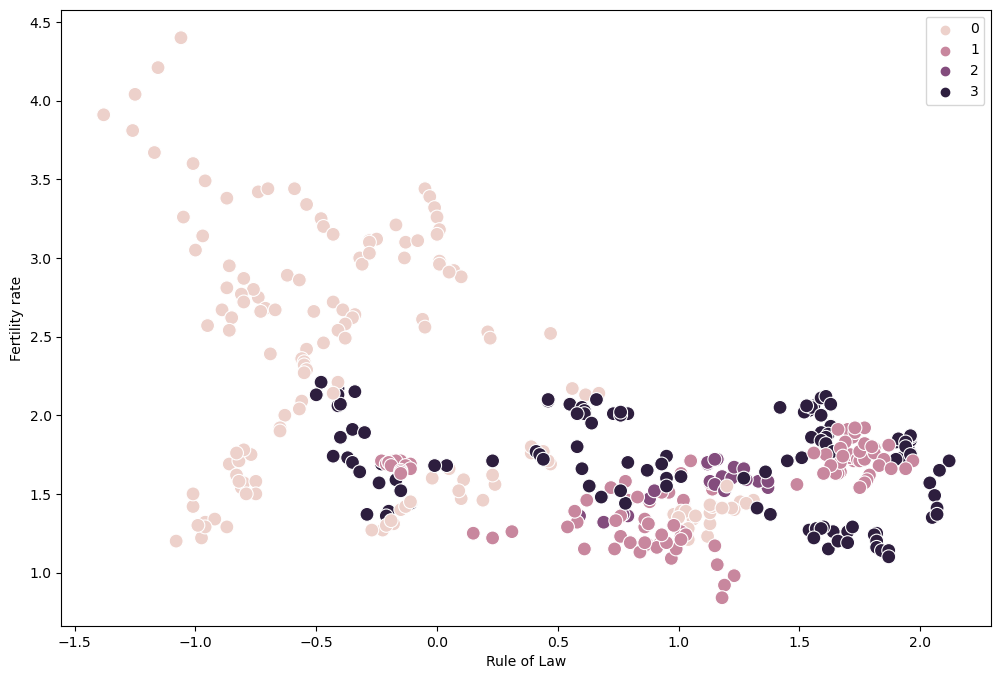

In [49]:
plt.figure(figsize=(12,8))
ax=sns.scatterplot(x=df_cl['r_law'], y=df_cl['fertility'], hue = kmeans.labels_, s=100)
ax.grid(False)
plt.ylabel('Fertility rate')
plt.xlabel('Rule of Law')
plt.show()

The dark purple cluster, characterized by higher rule of law indices, exhibits lower fertility rates, suggesting that strong legal frameworks and government stability contribute to an environment where individuals feel secure about their future, leading to lower fertility rates. Similarly, the lila cluster, with relatively higher rule of law indices, also shows lower fertility rates, indicating that effective legal institutions and protection of individual rights and property promote social and economic stability. The rosa cluster, with moderate rule of law indices, displays moderate fertility rates, suggesting that the impact of legal governance on fertility decisions may be more modest within this cluster.

In [50]:
#creating a new columns whith clusters named by color

df_cl.loc[df_cl['clusters'] == 3, 'cluster'] = 'dark purple'
df_cl.loc[df_cl['clusters'] == 2, 'cluster'] = 'lila'
df_cl.loc[df_cl['clusters'] == 1, 'cluster'] = 'rosa'
df_cl.loc[df_cl['clusters'] == 0, 'cluster'] = 'beige'

C:\Users\esgib\AppData\Local\Temp\ipykernel_14832\2045384859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl.loc[df_cl['clusters'] == 3, 'cluster'] = 'dark purple'


In [51]:
#Creating a statistics summary to better compare the clusters

df_cl.groupby('cluster').agg({'fertility':['mean', 'median', 'min', 'max'], 
                         'r_law':['mean', 'median', 'min', 'max'], 
                         'non_rel':['mean', 'median', 'min', 'max'],
                          'ed_ind':['mean', 'median', 'min', 'max']})

fertility                        r_law                     \
                 mean median   min   max      mean median   min   max   
cluster                                                                 
beige        2.278200  2.305  1.20  4.40 -0.224867 -0.385 -1.38  1.31   
dark purple  1.708559  1.730  1.10  2.21  1.042246  1.400 -0.50  2.12   
lila         1.558095  1.580  1.32  1.72  1.090000  1.150  0.59  1.37   
rosa         1.524818  1.630  0.84  1.92  1.073682  1.020 -0.23  1.97   

               non_rel                       ed_ind                        
                  mean median   min   max      mean  median    min    max  
cluster                                                                    
beige         3.512000   4.00   0.5  10.5  0.643111  0.6717  0.352  0.780  
dark purple  18.324576  16.35  11.1  29.3  0.751758  0.7665  0.588  0.890  
lila         72.890476  73.50  69.0  74.7  0.850000  0.8590  0.808  0.859  
rosa         40.970909  42.40  29.8  48.0  0.815527  0.8340  0.695  0.894

# Creating a final dataset which would be used in Tableau

In [52]:
df_merged_filled.shape

(399, 7)

In [53]:
#checking for duplicates
df_merged_filled_dup = df_merged_filled[df_merged_filled.duplicated()]
df_merged_filled_dup.shape

(0, 7)

In [54]:
df_cl_dup = df_cl[df_cl.duplicated()]
df_cl_dup.shape

(2, 6)

In [55]:
df_cl.shape

(399, 6)

In tableau I will need the cluster columns to create a good vizualization. To be able to associate cluster color to the right country I used the combination "fertility rate & rule of law index & education index" as a merging critatria. We see that in df_cl (subset used for clustering) there are 2 duplicates. That will not affect the correctness of the merging, because if the "fertility rate & rule of law index & education index" are same, it means that they will be assighned to the same cluster, so the cluster value will be merged correctly to the country.

In [56]:
#proceeding with merging

df_final = pd.merge(df_merged_filled, df_cl, on = ['r_law', 'non_rel', 'fertility', 'ed_ind'], how = 'left' )

In [57]:
df_final.head()

,country,code,year,fertility,r_law,non_rel,ed_ind,clusters,cluster
0,Czechia,CZE,2000,1.15,0.610,40.4,0.783,1,rosa
1,Czechia,CZE,2001,1.15,0.735,40.5,0.783,1,rosa
2,Czechia,CZE,2002,1.17,0.860,40.6,0.783,1,rosa
3,Czechia,CZE,2003,1.18,0.870,40.7,0.783,1,rosa
4,Czechia,CZE,2004,1.23,0.760,40.8,0.783,1,rosa


In [58]:
df_final.shape

(405, 9)

In [59]:
df_final.isnull().sum()

country      0
code         0
year         0
fertility    0
r_law        0
non_rel      0
ed_ind       0
clusters     0
cluster      0
dtype: int64

In [60]:
#checking for duplicates
df_dup = df_final[df_final.duplicated()]
df_dup.shape

(6, 9)

In [61]:
df_final = df_final.drop_duplicates()

In [62]:
df_final.shape

(399, 9)

In [63]:
df_final.to_excel(os.path.join(path, 'Prepared Data', 'Set_for_Tableau.xlsx'))